In [1]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/base_train.csv"
s=requests.get(url).content
X_train = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")
X_train = X_train.drop(columns=['Unnamed: 0'])

url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/base_train_answer.csv"
s=requests.get(url).content
df_diagnosis = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")
df_diagnosis = df_diagnosis.drop(columns=['Unnamed: 0'])
y_train = df_diagnosis['diagnosis'].ravel()

# joining info and diagnosis into one df
df_full = pd.concat([df_diagnosis, X_train], axis=1)
df_full.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.880,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488
1,B,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,...,12.900,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
2,M,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390
3,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,16.220,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
4,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039


In [2]:
print(X_train.shape)
print(y_train.shape)

(512, 30)
(512,)


In [3]:
# normalizing test dataframe

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train), 
        index=X_train.index, 
        columns=X_train.columns
    )

X_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.155190,0.169090,0.154861,0.075546,0.416990,0.221489,0.083903,0.101243,0.289394,0.438742,...,0.104945,0.198827,0.101997,0.042248,0.387336,0.126289,0.061214,0.140000,0.206462,0.195723
1,0.257892,0.246534,0.240550,0.141591,0.207096,0.046500,0.031443,0.084443,0.208081,0.123389,...,0.176805,0.218284,0.156133,0.081277,0.020092,0.012504,0.019120,0.097320,0.079829,0.028073
2,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831,0.437879,0.325617,...,0.547492,0.581023,0.503959,0.367627,0.546516,0.688770,0.561197,0.652577,0.415301,0.517250
3,0.344503,0.286101,0.327759,0.207678,0.118534,0.100669,0.057990,0.068290,0.290404,0.128849,...,0.294913,0.352878,0.275860,0.155943,0.093385,0.178161,0.133761,0.258763,0.254455,0.142464
4,0.036869,0.501522,0.028540,0.015907,0.000000,0.074351,0.000000,0.000000,0.266162,0.193929,...,0.054287,0.489072,0.043578,0.020497,0.061620,0.029423,0.000000,0.000000,0.310287,0.100682


Best estimator: 1
    estimators     score
0          1.0  0.934474
1          2.0  0.883158
2          3.0  0.934211
3          4.0  0.913684
4          5.0  0.928947
5          6.0  0.923684
6          7.0  0.923684
7          8.0  0.918684
8          9.0  0.933684
9         10.0  0.913158
10        11.0  0.933684
11        12.0  0.913158
12        13.0  0.923684
13        14.0  0.908421
14        15.0  0.913421
15        16.0  0.913421
16        17.0  0.913421
17        18.0  0.903421
18        19.0  0.908421
19        20.0  0.898421
20        21.0  0.898421
21        22.0  0.893158
22        23.0  0.898158
23        24.0  0.893158
24        25.0  0.893158
25        26.0  0.893158
26        27.0  0.903421
27        28.0  0.893158
28        29.0  0.893158


<AxesSubplot:xlabel='estimators', ylabel='score'>

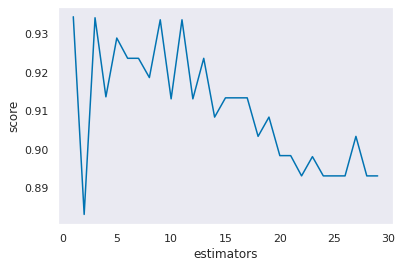

In [4]:
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators
result = []
best_score = 0
best_estimator = 0

for i in range(1, 30):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train_scaled, y_train)
    s = make_scorer(recall_score, pos_label='M')
    scores = cross_val_score(modelK, X_train_scaled, y_train, cv=10, scoring=s)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')
print(df_scores)

sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )

In [5]:
modelK = KNeighborsClassifier(n_neighbors=1)
modelK.fit(X_train_scaled, y_train)
s = make_scorer(recall_score, pos_label='M')
scores = cross_val_score(modelK, X_train_scaled, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(modelK, X_train_scaled, y_train, cv=5)
print("recall_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

recall_score: 0.94372 (+/- 0.04112)


In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[299  17]
 [ 11 185]]
              precision    recall  f1-score   support

           B       0.96      0.95      0.96       316
           M       0.92      0.94      0.93       196

    accuracy                           0.95       512
   macro avg       0.94      0.95      0.94       512
weighted avg       0.95      0.95      0.95       512



## Validação final

In [7]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/base_test.csv"
s=requests.get(url).content
X_test = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")
X_test = X_test.drop(columns=['Unnamed: 0'])

url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/base_test_answer.csv"
s=requests.get(url).content
df_diagnosis_test = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")
df_diagnosis_test = df_diagnosis_test.drop(columns=['Unnamed: 0'])
y_test = df_diagnosis_test['diagnosis'].ravel()

print(X_test.shape)
print(y_test)

(57, 30)
['B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'M']


In [8]:
# normalizing validating dataframe
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_test_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_test), 
        index=X_test.index, 
        columns=X_test.columns
    )

X_test_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.383401,0.307362,0.378952,0.272930,0.389304,0.347309,0.255815,0.397646,0.508608,0.259720,...,0.321871,0.231732,0.329313,0.225284,0.420039,0.369257,0.299920,0.549126,0.261586,0.253128
1,0.214850,0.639441,0.213911,0.137827,0.007059,0.321969,0.253770,0.280414,0.000000,0.314597,...,0.124964,0.522406,0.168241,0.074490,0.121330,0.350544,0.232588,0.424078,0.084037,0.304314
2,0.746817,0.434175,0.757797,0.675166,0.626714,0.540428,0.701917,1.000000,0.422525,0.290824,...,0.766593,0.422689,0.729313,0.705835,0.565029,0.458052,0.488898,0.768932,0.244078,0.355062
3,0.587512,0.607738,0.595970,0.487111,0.287227,0.398756,0.309808,0.706874,0.649211,0.049100,...,0.500528,0.463060,0.506868,0.399968,0.304624,0.309186,0.183546,0.593398,0.264470,0.141132
4,0.531328,0.401397,0.512378,0.410479,0.380481,0.235122,0.187284,0.455273,0.209469,0.077760,...,0.391989,0.390795,0.368174,0.284561,0.451778,0.167590,0.132827,0.354291,0.125850,0.052323


In [9]:
y_pred_test = modelK.predict(X_test_scaled)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[34  7]
 [ 0 16]]
              precision    recall  f1-score   support

           B       1.00      0.83      0.91        41
           M       0.70      1.00      0.82        16

    accuracy                           0.88        57
   macro avg       0.85      0.91      0.86        57
weighted avg       0.91      0.88      0.88        57

